# Weekly Session 8

## Goal
To develop a basic familiarity and proficiency with numerical rootfinding.

## Readings
We will skip the remainder of the linear equations section and move directly onto solutions of nonlinear equations.

    6.3.1 Relaxation Method
    
    6.3.2 Convergence Rate
    
    6.3.4 Binary search -- a.k.a. the bisection method

    6.3.5 Newton's method -- a.k.a. the Newton-Raphson method

    6.3.6 The secant method -- a.k.a. the Dekker secant method

Although we will not specifically cover extremization in this week's
handout, you should also read enough to get a basic idea of what is
possible:

    6.4 Maxima and minima of functions
    
## Overview
We will start with a brief introduction to solving non-linear equations, using the relaxation method.  Then you will build up your own module named ```rootfind```, containing functions which implement each of the basic numerical rootfinding methods: the **bisection** method, the **Newton-Raphson** method (for when the derivative is known), and the **Dekker secant** method (for when it is not).  You will also see the value in *hybridizing* these latter two methods with the bisection method.  

In [3]:
#For colored cells, currently blue cells, black text 
#https://stackoverflow.com/questions/18024769/adding-custom-styled-paragraphs-in-markdown-cells
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

<div class=answer>
*This should be a blue cell with black font if you set the filepath correctly*</font>
<div/>

## Exercise 0 - Jupyter Notebook + Git Terminal Skills.

### Keyboard Shortcuts

Read this and try some out.
http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html

My favorites are "B," "M," and "Enter" so far, but I'm working on more.

### Gitshell
Pop open a git shell 
Do stuff
New parnter
Share Repo
Modify Repo
Merge Repo

## Exercise -1 Relaxation Method

In [36]:
plt.rcParams.keys()

['agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format',
 'animation.html',
 'animation.mencoder_args',
 'animation.mencoder_path',
 'animation.writer',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits',
 'axes.formatter.use_locale',
 'axes.formatter.use_mathtext',
 'axes.formatter.useoffset',
 'axes.grid',
 'axes.grid.axis',
 'axes.grid.which',
 'axes.hold',
 'axes.labelcolor',
 'axes.labelpad',
 'axes.labelsize',
 'axes.labelweight',
 'axes.linewidth',
 'axes.prop_cycle',
 'axes.spines.bottom',
 'axes.spines.left',
 'axes.spines.right',
 'axes.spines.top',
 'axes.titlesize',
 'axes.titleweight',
 'axes.unicode_minus',
 'axes.xmargin',
 'axes.ymargin',
 'axes3d.grid',
 'backend',
 'backend.qt4',
 'backend.qt5',
 'backend_fallback',
 'boxplot.bootstrap',
 'boxplot.

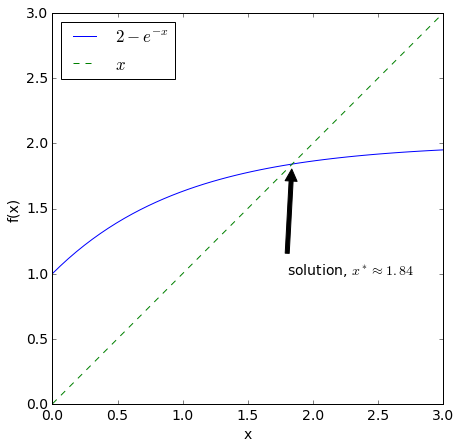

In [51]:
import math
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams['font.size']=14

def f(x):
    '''Calculates a simple mathematic function
    accepts: x - float
    returns f(x) - float
    '''
    return 2 - np.exp(-x)

x = np.linspace(0,3)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

ax.plot(x,f(x),label=r"$2-e^{-x}$")
ax.plot(x,x,label=r"$x$",ls='--')
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_aspect('equal')

#rootfind
#ax.axhline(y=0,ls='--',color='gray')

ax.annotate(r'solution, $x^* \approx 1.84$', xy=(1.84, 1.84), xytext=(1.8, 1.0),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

#### Prove mathematically that the Relaxation Method will work on the function above.  Explain

In [53]:
print(np.exp(-1.84))

0.158817426107


<div class=answer>
<div/>
Answer here

## Exercise 1
You will use the function
$$\label{eqn-bench}
f(x)=\cos x - x
$$
as a benchmark  in developing the following routines.  To orient yourself, first make a plot of the benchmark function.
You will want to plot it over a
reasonably wide range, *e.g.*, $-10\leq x \leq 10$, since you will be playing with different choices of initial intervals and guess points in this range.


In [4]:
#your plot here

## Exercise 2 - introduction to bisection
 If the tolerance is $10^{-3}$, how many bisections do you expect to need?  What if the tolerance is $10^{-6}$?  Or $10^{-9}$?  Try this out, and record the number of iteration and the approximate root (or, rather, root-containing interval) you find in each case, for $\cos x - x$.
 
 *Hint:* An incredibly-convenient almost-equality is 
$2^{10} = 1024 \approx 1000 = 10^3$.  Remember this.  Forever.  This is why 1024~bytes make a "kilobyte'' to a computer scientist.

<div class=answer>
<div/>
Answer here

What happens if you ask for a tolerance of $10^{-21}$?  Does it take as many iterations as you expect?  Do you get what you asked for?  Explain roughly what is going on. 

<div class=answer>
<div/>
Answer here

In [ ]:
# bisection.py -- bisection demo 
# 
# Language: Python 3
# Mark A. Caprio
# University of Notre Dame
# Written for Computational Methods in Physics, Spring 2014.

# read in external libraries
import math

# define function for rootfinding
def f(x):
    return math.cos(x) - x

# define tolerance on final result (hence number of bisections)
tolerance = 1e-3

# set up initial bracketing interval
#   Note: Sign of function *must* change in this interval for method to work.
xa = 0.
xb = 1.
error = xb - xa
iteration_count = 0

# bisect until tolerance reached
while (error > tolerance):

    # increment iteration count
    iteration_count += 1
    print ("iteration", iteration_count)
    
    # find interval midpoint
    xm = (xa + xb) / 2
    print ("  xa =",xa,";","xb =",xb,"->","xm=",xm)

    # evaluate function
    fxa = f(xa)
    fxb = f(xb)
    fxm = f(xm)
    print ("  f(xa) =",fxa,";","f(xb) =",fxb,";","f(xm)=",fxm)

    # find which subinterval contains root
    if (fxm == 0):
        # accidentally landed on root (often occurs for "toy" test intervals)
        print ("  landed on root")
        xa = xm
        xb = xm
    elif ((fxa * fxm) < 0):
        # sign change is in left half of interval
        print ("  left subinterval")
        xb = xm
    else:
        # sign change is in right half of interval
        print ("  right subinterval")
        xa = xm

    # find new error to use in tolerance test
    error = xb - xa
    print ("  error =",error)
        
# give result
print ("root lies in interval",xa,"<= x <=",xb)

## Exercise 3 - Bisection method 

The bisection method is our baseline method, to which we will be
comparing the other new members.  Moreover, we will be using bisection
steps when we "hybridize" the bisection method with the other, more
sophisticated rootfinding methods.  So, let us start off our new
\mcmd{rootfind} module by bundling our old code from
\mcmd{bisection.py} into a function.  You can find the full code in
\mcmd{rootfind\_TEMPLATE.py}, but here is the documentation for the
interface:
```
def bisection(f,interval,tolerance,verbose=False):
    """ Find root by bisection.

    The 'approximation' x_i at each iteration is defined by the
    midpoint of the interval.
    
    The 'error' x_i-x_(i-1) is defined by the change in midpoint from
    the midpoint of the last interval.  (Of course, for bisection,
    that is always half the width of the new interval.)

    Returns None if the sign of the function does not change on the
    given interval.  Otherwise, returns final midpoint x_i when
    termination condition is reached.

    f: function for rootfinding
    interval: tuple containing initial interval endpoints (xa,xb)
    tolerance: difference x_i-x_(i-1) at which search should terminate
    verbose (optional): whether or not to print iteration log
    """
```

*Comment:* Actually, Mark have rewrote the bisection code quite a bit, so take a
close look, and make sure you understand the logic.  He changed the the loop structure to provide a better starting point for the approach we will need to take with in the other rootfinding methods.

For instance, all these other methods are based on the idea of finding successive approximations $x_i$ ($i=0$, $1$, $2$, $\ldots$).  Then the "error" is estimated the difference between the two most recent approximate roots, *i.e.*,
$$
\epsilon_i = x_i - x_{i-1}.
$$
When this estimated error falls below the tolerance, we terminate and return the "last guess" $x_i$.  We can think about the bisection method somewhat the same way (at least, we can phrase the termination condition and return value the same way) if we think of the "midpoint'' of our interval as $x_i$.

Try ```bisection``` out on the benchmark function, using the interval $(0,1)$ and a tolerance $10^{-10}$.  How many
iterations are required?

<div class=answer>
<div/>
Answer here

What happens if you use the interval $(-1,0)$, and why?

<div class=answer>
<div/>
Answer here

## Exercise 4: Newton-Raphson method

Now let us go ahead and code a function to implement the Newton-Raphson method.  I have gotten us started by defining the interface:

```
def newton(f,fp,x_guess,tolerance,verbose=False,max_iterations=100):
    """ Find root by Newton's method.

    The 'approximation' x_i at each iteration is defined by Newton's
    method, in terms of the previous approximation x_(i-1).
    
    The 'error' x_i-x_(i-1) is defined by the difference in successive
    approximations.

    Returns None if the maximum number of iterations is reached
    without satisfying the tolerance.  Also returns None if
    rootfinding lands on point where f has zero slope.  Otherwise,
    returns final approximation x_i when termination condition is
    reached.

    f: function for rootfinding
    fp: derivative of function for rootfinding (i.e., 'f prime')
    x_guess: initial guess point
    tolerance: error at which search should terminate
    verbose (optional): whether or not to print iteration log
    max_iterations (optional): limit on number of iterations
    """
```
Notice that, in case
of complete failure, we should put in a maximum number of iterations as a "safety net", to avoid an infinite loop.

Try your function out on our benchmark function, picking starting points reasonably near the root.  Actually, when it comes time to print out a test case to hand in, please use $x_0=0.5$.

Now, we probably thought of bisection as being pretty "fast" as a way to get to the root.  After all, on the very first day of class, we saw in **Exercise N** the error in the bisection method falls exponentially with the number of iterations
$$
\epsilon_i \propto \frac{1}{2^i}.
$$
And "exponential" is "fast", right?  But from Newman you have seen that we expect the Newton-Raphson method to be even faster, at least, once we have gotten close enough to a root that the function is basically described by the first couple of terms in its Taylor series around that root.
 
So let us actually compare the performance of ```bisect``` and ```newton```.  We have already run the necessary test cases.  For ```bisect```, we started with the initial interval $(0,1)$, and, for ```newton```, 
we used $x_0=0.5$, which is the midpoint of this interval.  So it seems reasonable to compare these test cases.  Based on your log of iterations (from the verbose output) make a table indicating how many how many digits of
the answer $x_i$ are correct, with each method, after each iteration ($i=0$, $1$, $2$, $\ldots$).

<div class=answer>
<div/>
Answer here

For the *bisection* method, does the growth in the number of correct digits look linear in the number of iterations, or perhaps quadratic, or exponential?  How about for the *Newton-Raphson* method (the trend here may be
harder to judge by eye)?  Explain these results in terms of the expected convergence rates (from Newman).

<div class=answer>
<div/>
Answer here

What happens if you start Newton's method instead with the initial guess point $x=5$?  How about $x=10$?  Explain what's going on.  It will help to look back at your plot of this function.  

<div class=answer>
<div/>
Answer here

## Exercise 5: More on Newton's method

Here's one more illustration with Newton's method.  Let's try it out on the function
$$
\begin{equation}
f(x)=x^2+1.
\end{equation}
$$
What happens if you pick $x=0$ as the starting point?  How about
$x=0.5$?

In [ ]:
#your code here

<div class=answer>
<div/>
Answer here

*Comment:* Notice that we were applying a rootfinding method, to a function which
had no root. A physics professor of mine promulgated this bit of wisdom:

    **First rule: Think before you try cranking away!**

But, even if we were immune to being so silly as to ever attempt this, there is
a lesson to be learned.  What if our function *had* a root, off somewhere far away from the initial guess point, but the guess point landed us near a local minimum in the function?  Our function would locally look just like this parabola, and the Newton-Raphson method could become trapped oscillating around the minimum, in just this fashion.

\textit{Summary:} Here is an attempt at summarizing the lessons we have learned.  When it works, Newton-Raphson converges much more rapidly than bisection.  However, sometimes it jumps around before converging.  Sometimes it just oscillates, without converging.  Or, if the starting point is not close enough to a root, the method may go
completely astray.

**When it's good, it's very, very good.  When it's bad, it's horrid.**

## Exercise 6: Hybridized Newton-Raphson method

How can we get the best of both worlds: the reliability of the bisection method,
but the rapid convergence of the Newton-Raphson method?  We can *hybridize* the bisection method with the
Newton-Raphson method.

#### Here is a sketch (pseudocode) of the hybrid method:

* Assume that we are given an interval $(a,b)$ which is known to contain a root.


* Choose a starting point $x_0$ in that interval, say, the midpoint.


* Until the difference between successive guesses falls below the tolerance:

    *  Do a Newton-Raphson step: 
        $$
        x_i \leftarrow x_{i-1}- \frac{f(x_{i-1})}{f'(x_{i-1})}.
        $$

    * Test to see if $x_i$ is in the interval.

    *  YES, keep $x_i$ as the new guess, and use it to determine a new, tighter interval.  
        - *RECALL: Given $a<x<b$, if $f(a)\ f(x)<0$, the root lies between $a$ and $x$, otherwise between $x$ and  $b$.*
    
    * NO, then the Newton-Raphson step has failed, so make a bisection step.  
         - *This gives us a new interval.  And we can use this interval's midpoint, say, as our new guess point $x_{i+1}$.*


#### What are the necessary parameters for a hybridized Newton-Raphson rootfinding function?  


*Note:* There is no reason that our initial guess *has* to be the midpoint of our initial interval.  We *could* write or code this way, but we could also allow the user to come up with the initial guess.  The user might know of a better way of generating the initial guess, for instance, from an approximate formula for the roots of the function of interest (or perhaps a ouiji board?).

<div class=answer>
<div/>
Answer here

Write a function ```hybrid_newton```.
*Hint:* Make sure the verbose output logs all iterations -- both Newton-Raphson and bisection -- since you will need this information in a moment.

In [10]:
#your code here

Try out your implementation of the hybrid method on our benchmark
function.  For each of the three initial guesses we tried above
($x_0=0.5$, $5$, and $10$), repeat using the exact same initial guess,
but now contained within an appropriate interval.  What sequence of *Newton-Raphson* and *bisection* steps is necessary in each case?

<div class=answer>
<div/>
Answer here

## Exercise 7: Dekker secant method

You have just read about the Dekker secant method in Newman, but let us review the basic idea.  What if we do *not* have a simple formula for the *derivative* of the function of interest, or any simple procedure for evaluating this derivative, or it is very costly to do so?  Perhaps evaluating $f(x)$ involves doing numerical integration, or numerically solving a differential equation, or finding the eigenvalue of a matrix (where the matrix elements depend somehow on $x$ -- so it is no simple matter just to plug in $x$ and get $f'(x)$.  

We can still come up with a poor man's version of the Newton-Raphson method: we use the values of $f$ which we found at the last *two* points $x_{i-1}$ and $x_i$, to *approximate* the derivative $f'(x_i)$ in Newton's method.  This gives us the *Dekker secant method*:
$$
\begin{aligned}
x_{i+1} &\leftarrow x_i - \frac{f(x_i)}{f'(x_i)} &&\text{Newton-Raphson}\\
x_{i+1} &\leftarrow x_i - f(x_i)\frac{x_i-x_{i-1}}{f(x_i)-f(x_{i-1})}
&&\text{Dekker secant}.
\end{aligned}
$$
Geometrically, this means that, rather than using the *tangent* line to find the next approximation, we are using the *secant* line (hence the name of the method).

What parameters will a Dekker secant rootfinding function require?

<div class=answer>
<div/>
Answer here

Write a rootfinding function ```secant```, which implements the Dekker secant method.  Try it out on the benchmark function, with reasonable first guesses.  Actually, for your example output, try to
choose initial conditions which roughly match the starting point $x_0=0.5$ we used before, with the
Newton-Raphson method.  Qualitatively compare the results with the Newton-Raphson method.

In [12]:
#your code here

<div class=answer>
<div/>
Answer here

## Exercise 8: Hybridized Dekker secant

Alas, in the Dekker secant method, we have inherited all the failings
of the Newton-Raphson method, along with (most of) the benefits.  So
it is time to hybridize again...  What parameters will a hybridized
bisection and Dekker secant rootfinding function require?

<div class=answer>
<div/>
Answer here

Write a function ```hybrid_secant```, and try it out on our benchmark function.  Try to choose initial conditions which roughly match the three different starting points and intervals you used when you tested the hybridized
Newton-Raphson method.

In [12]:
#your code here